<a href="https://colab.research.google.com/github/alowjw08/Eye-Wonder-An-Eye-Tracking-Study-on-Optical-Illusions/blob/main/Eye_Wonder_An_Eye_Tracking_Study_on_Optical_Illusions%22_%E2%80%93_University_of_Malaya_Cognitive_Science_T2G3_202420255.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Acquisition**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
pd.set_option('display.max_columns', None)

file_path = '/content/drive/MyDrive/Colab Notebooks/Optical_Illusion Data export.tsv'
df = pd.read_csv(file_path, sep='\t')

print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-6-2882843211.py:8: DtypeWarning: Columns (37,38,76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t')


   Recording timestamp  Computer timestamp       Sensor      Project name  \
0                    0         71029368689          NaN  Optical_Illusion   
1                 3519         71029372208  Eye Tracker  Optical_Illusion   
2                11857         71029380546  Eye Tracker  Optical_Illusion   
3                20190         71029388879  Eye Tracker  Optical_Illusion   
4                28523         71029397212  Eye Tracker  Optical_Illusion   

  Export date Participant name Recording name Recording date  \
0  09/06/2025               P1     Recording3     30/04/2025   
1  09/06/2025               P1     Recording3     30/04/2025   
2  09/06/2025               P1     Recording3     30/04/2025   
3  09/06/2025               P1     Recording3     30/04/2025   
4  09/06/2025               P1     Recording3     30/04/2025   

  Recording date UTC Recording start time Recording start time UTC  \
0         30/04/2025         12:10:46.697             04:10:46.697   
1         30

In [ ]:
print(df.columns)

Index(['Recording timestamp', 'Computer timestamp', 'Sensor', 'Project name',
       'Export date', 'Participant name', 'Recording name', 'Recording date',
       'Recording date UTC', 'Recording start time',
       ...
       'Client area position X (DACSpx)', 'Client area position Y (DACSpx)',
       'Viewport position X', 'Viewport position Y', 'Viewport width',
       'Viewport height', 'Full page width', 'Full page height',
       'Mouse position X', 'Mouse position Y'],
      dtype='object', length=101)


In [ ]:
print("\nUnique values in each column:\n")
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"{col} ({len(unique_vals)} unique): {unique_vals[:10]}{'...' if len(unique_vals) > 10 else ''}")


Unique values in each column:

Recording timestamp (1373315 unique): [    0  3519 11857 20190 28523 36857 45190 53523 61857 70190]...
Computer timestamp (1380420 unique): [71029368689 71029372208 71029380546 71029388879 71029397212 71029405546
 71029413879 71029422212 71029430546 71029438879]...
Sensor (3 unique): [nan 'Eye Tracker' 'Mouse']
Project name (1 unique): ['Optical_Illusion']
Export date (1 unique): ['09/06/2025']
Participant name (85 unique): ['P1' 'P2' 'P3' 'P4' 'P5' 'P6' 'P7' 'P8' 'P9' 'P10']...
Recording name (85 unique): ['Recording3' 'Recording4' 'Recording5' 'Recording6' 'Recording7'
 'Recording8' 'Recording9' 'Recording10' 'Recording11' 'Recording12']...
Recording date (6 unique): ['30/04/2025' '08/05/2025' '09/05/2025' '13/05/2025' '14/05/2025'
 '15/05/2025']
Recording date UTC (6 unique): ['30/04/2025' '08/05/2025' '09/05/2025' '13/05/2025' '14/05/2025'
 '15/05/2025']
Recording start time (85 unique): ['12:10:46.697' '12:17:04.125' '12:22:02.455' '12:26:06.639'
 '

In [ ]:
print("Null values per column:\n")

for col in df.columns:
    null_count = df[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count} null values")

Null values per column:

Sensor: 5144 null values
Eyetracker timestamp: 71339 null values
Event: 1378382 null values
Event value: 1378722 null values
Gaze point X: 184072 null values
Gaze point Y: 184072 null values
Gaze point left X: 197911 null values
Gaze point left Y: 197911 null values
Gaze point right X: 198599 null values
Gaze point right Y: 198599 null values
Gaze direction left X: 197911 null values
Gaze direction left Y: 197911 null values
Gaze direction left Z: 197911 null values
Gaze direction right X: 198599 null values
Gaze direction right Y: 198599 null values
Gaze direction right Z: 198599 null values
Pupil diameter left: 197911 null values
Pupil diameter right: 198599 null values
Pupil diameter filtered: 178349 null values
Eye openness left: 121681 null values
Eye openness right: 121656 null values
Eye openness filtered: 112094 null values
Validity left: 71339 null values
Validity right: 71339 null values
Eye position left X (DACSmm): 197911 null values
Eye position le

# **Research Question 1 : Are there gender-based differences in visual scanning patterns or fixation duration?**

Null Hypothesis (H₀): There is no significant difference in fixation durations between male and female participants.

Alternative Hypothesis (H₁): There is a significant difference in fixation durations between male and female participants.

## **1.1 Data Pre-Processing**

Cleaned and standardized Participant ID (e.g., from P1 to P01)

Merged with gender data

Filtered rows to include only Fixation events

Dropped missing/null durations

In [ ]:
# read in gender lookup table and skip header rows

gender_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/gender_data.xlsx', skiprows=2)
print(gender_df.head())


   Gender  Project Participant name
0    Male  Optical              P01
1  Female  Optical              P02
2  Female  Optical              P03
3    Male  Optical              P04
4    Male  Optical              P05


In [ ]:
# standardise primary key to prevent mismatches like P1 vs P01
def fix_participant_name(name):
    if name.startswith("P"):
        num = int(name[1:])
        return f"P0{num}" if num < 10 else f"P{num}"
    return name

df['Participant name'] = df['Participant name'].apply(fix_participant_name)
print(df.head())

   Recording timestamp  Computer timestamp       Sensor      Project name  \
0                    0         71029368689          NaN  Optical_Illusion   
1                 3519         71029372208  Eye Tracker  Optical_Illusion   
2                11857         71029380546  Eye Tracker  Optical_Illusion   
3                20190         71029388879  Eye Tracker  Optical_Illusion   
4                28523         71029397212  Eye Tracker  Optical_Illusion   

  Export date Participant name Recording name Recording date  \
0  09/06/2025              P01     Recording3     30/04/2025   
1  09/06/2025              P01     Recording3     30/04/2025   
2  09/06/2025              P01     Recording3     30/04/2025   
3  09/06/2025              P01     Recording3     30/04/2025   
4  09/06/2025              P01     Recording3     30/04/2025   

  Recording date UTC Recording start time Recording start time UTC  \
0         30/04/2025         12:10:46.697             04:10:46.697   
1         30

In [ ]:
# combine eye tracking records with gender info

print("df columns:", df.columns.tolist())
print("gender_df columns:", gender_df.columns.tolist())

df columns: ['Recording timestamp', 'Computer timestamp', 'Sensor', 'Project name', 'Export date', 'Participant name', 'Recording name', 'Recording date', 'Recording date UTC', 'Recording start time', 'Recording start time UTC', 'Recording duration', 'Timeline name', 'Recording Fixation filter name', 'Recording software version', 'Recording resolution height', 'Recording resolution width', 'Recording monitor latency', 'Average calibration accuracy (mm)', 'Average calibration precision SD (mm)', 'Average calibration precision RMS (mm)', 'Average calibration accuracy (degrees)', 'Average calibration precision SD (degrees)', 'Average calibration precision RMS (degrees)', 'Average calibration accuracy (pixels)', 'Average calibration precision SD (pixels)', 'Average calibration precision RMS (pixels)', 'Average validation accuracy (mm)', 'Average validation precision SD (mm)', 'Average validation precision RMS (mm)', 'Average validation accuracy (degrees)', 'Average validation precision SD 

In [ ]:
merged_df = pd.merge(df, gender_df, on='Participant name', how='left')
print(merged_df.head())
print(merged_df.columns)


   Recording timestamp  Computer timestamp       Sensor      Project name  \
0                    0         71029368689          NaN  Optical_Illusion   
1                 3519         71029372208  Eye Tracker  Optical_Illusion   
2                11857         71029380546  Eye Tracker  Optical_Illusion   
3                20190         71029388879  Eye Tracker  Optical_Illusion   
4                28523         71029397212  Eye Tracker  Optical_Illusion   

  Export date Participant name Recording name Recording date  \
0  09/06/2025              P01     Recording3     30/04/2025   
1  09/06/2025              P01     Recording3     30/04/2025   
2  09/06/2025              P01     Recording3     30/04/2025   
3  09/06/2025              P01     Recording3     30/04/2025   
4  09/06/2025              P01     Recording3     30/04/2025   

  Recording date UTC Recording start time Recording start time UTC  \
0         30/04/2025         12:10:46.697             04:10:46.697   
1         30

## **1.2 Event Detection**

In [ ]:
# Filter Fixation Rows
fixation_df = merged_df[merged_df['Eye movement type'] == 'Fixation'].copy()
print(fixation_df[['Participant name', 'Gender', 'Eye movement type', 'Eye movement event duration']].head())


  Participant name Gender Eye movement type  Eye movement event duration
0              P01   Male          Fixation                       1491.0
1              P01   Male          Fixation                       1491.0
2              P01   Male          Fixation                       1491.0
3              P01   Male          Fixation                       1491.0
4              P01   Male          Fixation                       1491.0


In [ ]:
# Calculate fixation count again
fixation_counts = fixation_df.groupby(['Participant name', 'Gender']).size().reset_index(name='Fixation Count')


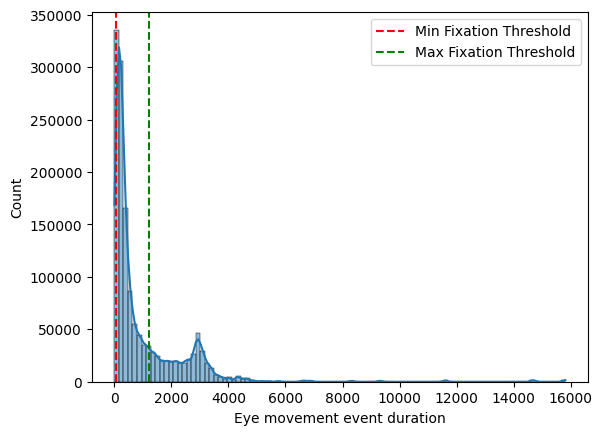

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(merged_df['Eye movement event duration'], bins=100, kde=True)
plt.axvline(60, color='red', linestyle='--', label='Min Fixation Threshold')
plt.axvline(1200, color='green', linestyle='--', label='Max Fixation Threshold')
plt.legend()

Plot of eye movement event duration above is highly right-skewed, with a huge spike near 0-200ms, and a long tail extending beyond 15000ms. The sharp peak below 200ms probably includes micro-saccades, glitches, or short eye movements, as fixations shorter than ~60 ms are often not processed cognitively - hence we shall define our lower bound as 60ms. Meanwhile the long tail beyond 1200ms suggests very few valid events beyond it, and can include artifacts, lost tracking or prolonged blinks, keeping these would distort mean-based analysis hence we define upper bound as 1200ms.

In [ ]:
# Filter Fixation events
df_fixation = merged_df[merged_df['Eye movement type'] == 'Fixation']

# Drop NaNs in duration
df_fixation = df_fixation.dropna(subset=['Eye movement event duration'])

# Keep only durations between 60ms and 1200ms
df_fixation = df_fixation[(df_fixation['Eye movement event duration'] >= 60) &
                          (df_fixation['Eye movement event duration'] <= 1200)]

# Keep relevant columns
df_fixation = df_fixation[['Participant name', 'Gender', 'Eye movement event duration']]


In [ ]:
# count how many fixations each participant made
gender_fixation_counts = fixation_counts.groupby('Gender')['Fixation Count'].mean().reset_index()

print(gender_fixation_counts)

   Gender  Fixation Count
0  Female    13134.333333
1    Male    12989.086207


## **1.3 Analysis**

In [ ]:
# Group by Participant & Gender, and Calculate Mean Fixation Duration + Fixation Count
fixation_summary = fixation_df.groupby(['Participant name', 'Gender']).agg(
    Mean_Fixation_Duration=('Eye movement event duration', 'mean'),
    Fixation_Count=('Eye movement event duration', 'count')
).reset_index()

print(fixation_summary.head())

  Participant name  Gender  Mean_Fixation_Duration  Fixation_Count
0              P01    Male              948.588970           12965
1              P02  Female              817.834810           20322
2              P03  Female             1035.314725           13990
3              P04    Male              696.397884           13705
4              P05    Male              300.118942           11224


In [ ]:
print(fixation_counts.columns)


Index(['Participant name', 'Gender', 'Fixation Count'], dtype='object')


In [ ]:
# Compute descriptive statistics by gender
descriptive_stats = fixation_summary.groupby('Gender').agg(
    n=('Participant name', 'count'),
    Mean_Duration=('Mean_Fixation_Duration', 'mean'),
    SD_Duration=('Mean_Fixation_Duration', 'std'),
    Mean_Count=('Fixation_Count', 'mean'),
    SD_Count=('Fixation_Count', 'std')
).reset_index()

# Round for readability
descriptive_stats['Mean_Duration'] = descriptive_stats['Mean_Duration'].round(1)
descriptive_stats['SD_Duration']   = descriptive_stats['SD_Duration'].round(1)
descriptive_stats['Mean_Count']    = descriptive_stats['Mean_Count'].round(0).astype(int)
descriptive_stats['SD_Count']      = descriptive_stats['SD_Count'].round(0).astype(int)

# Print as a simple table
print(descriptive_stats.to_string(index=False))

Gender  n  Mean_Duration  SD_Duration  Mean_Count  SD_Count
Female 27          845.7        159.7       13134      3258
  Male 58          987.3        246.1       12989      2977


In [ ]:
# Group by Participant & Gender, and Calculate Mean Fixation Duration + Fixation Count
fixation_summary = fixation_df.groupby(['Participant name', 'Gender']).agg(
    Mean_Fixation_Duration=('Eye movement event duration', 'mean'),
    Fixation_Count=('Eye movement event duration', 'count')
).reset_index()

male_duration = fixation_summary[fixation_summary['Gender'] == 'Male']['Mean_Fixation_Duration']
female_duration = fixation_summary[fixation_summary['Gender'] == 'Female']['Mean_Fixation_Duration']

In [ ]:
from scipy.stats import shapiro, levene
print(shapiro(male_duration), shapiro(female_duration))
print(levene(male_duration, female_duration))

ShapiroResult(statistic=np.float64(0.9647706014175654), pvalue=np.float64(0.09022909303270835)) ShapiroResult(statistic=np.float64(0.9838416506853592), pvalue=np.float64(0.9368773723994108))
LeveneResult(statistic=np.float64(2.0018530294976946), pvalue=np.float64(0.1608478719115928))


**Shapiro-Wilk Test for Normality**

For male participants, since W = 0.9648 and p = 0.0902 > 0.05, we fail to reject normality and hence distribution is approximately normal.

For female participants, since W = 0.9838 and p = 0.9369 > 0.05, we conclude that distribution is approximately normal.

Both gender groups likely follow a normal distribution.

**Levene's Test for Equal Variance**

statistic = 2.00 and p = 0.1608 > 0.05, we fail to reject the null hypothesis hence assume equal variances between two groups.


Although these statistics suggest that the variances between male and female groups are not significantly different, Welch’s t-test was chosen as a more robust alternative to the standard t-test as this test does not assume equal variances and is better suited for situations like this where sample sizes or variances may differ slightly. Given its greater reliability under less strict assumptions, we decided that Welch’s t-test ensures a more conservative and dependable analysis.

In [ ]:
from scipy.stats import ttest_ind

# Extract fixation counts by gender
male_counts = fixation_counts[fixation_counts['Gender'] == 'Male']['Fixation Count']
female_counts = fixation_counts[fixation_counts['Gender'] == 'Female']['Fixation Count']

# Fixation Count:
# Perform Welch’s t-test (does not assume equal variances)
t_stat_counts, p_val_counts = ttest_ind(male_counts, female_counts, equal_var=False)

print(f"T-statistic: {t_stat_counts:.3f}")
print(f"P-value: {p_val_counts:.4f}")

if p_val_counts < 0.05:
    print("There is a significant difference in fixation counts between genders.")
else:
    print("No significant difference in fixation counts between genders.")


T-statistic: -0.197
P-value: 0.8450
No significant difference in fixation counts between genders.


In [ ]:
# Fixation duration:
# Perform Welch’s t-test (does not assume equal variances)
from scipy.stats import ttest_ind

t_stat_dur, p_val_dur = ttest_ind(male_duration, female_duration, equal_var=False)


print(f"T-statistic (Duration): {t_stat_dur:.3f}")
print(f"P-value (Duration): {p_val_dur:.4f}")

if p_val_dur < 0.05:
    print("There is a significant difference in fixation durations between genders.")
else:
    print("No significant difference in fixation durations between genders.")



T-statistic (Duration): 3.174
P-value (Duration): 0.0022
There is a significant difference in fixation durations between genders.


The p-value (0.0022) is BELOW 0.05, so the null hypothesis is rejected. That means there is statistically significant difference between male and female participants in terms of fixation duration.

But, was our study strong enough to detect an effect if it was really there? We conducted power analysis to check that.

In [ ]:
# Estimate Cohen's d
import numpy as np

# Fixation duration
m1 = np.mean(male_duration)
m2 = np.mean(female_duration)
s1 = np.std(male_duration, ddof=1)
s2 = np.std(female_duration, ddof=1)
n1 = len(male_duration)
n2 = len(female_duration)

# Pooled SD
pooled_sd = np.sqrt(((s1**2) + (s2**2)) / 2)
cohen_d = abs(m1 - m2) / pooled_sd
print(f"Cohen's d: {cohen_d:.3f}")

Cohen's d: 0.682


There is a noticeable difference between the two gender groups in terms of the fixation duration.

In [ ]:
from statsmodels.stats.power import TTestIndPower

# Initialize power analysis object
analysis = TTestIndPower()

# Calculate required sample size
sample_size = analysis.solve_power(effect_size=cohen_d, alpha=0.05, power=0.80, alternative='two-sided')
print(f"Required sample size per group: {sample_size:.2f}")

Required sample size per group: 34.71


In [ ]:
from statsmodels.stats.power import TTestIndPower

ratio = n2 / n1  # female/male participants
sample_size_male = analysis.solve_power(effect_size=cohen_d, alpha=0.05, power=0.80, ratio=ratio, alternative='two-sided')
sample_size_female = sample_size_male * ratio
print(f"Male: {sample_size_male:.2f}, Female: {sample_size_female:.2f}")

Male: 54.42, Female: 25.33


Despite the significant results P-value (Duration): 0.0022, there is a noticeable imbalance in gender distribution within the sample (more male participants than female). This could potentially bias the effect size estimation or limit the generalizability of the findings.



## **1.4 Data Visualisation**

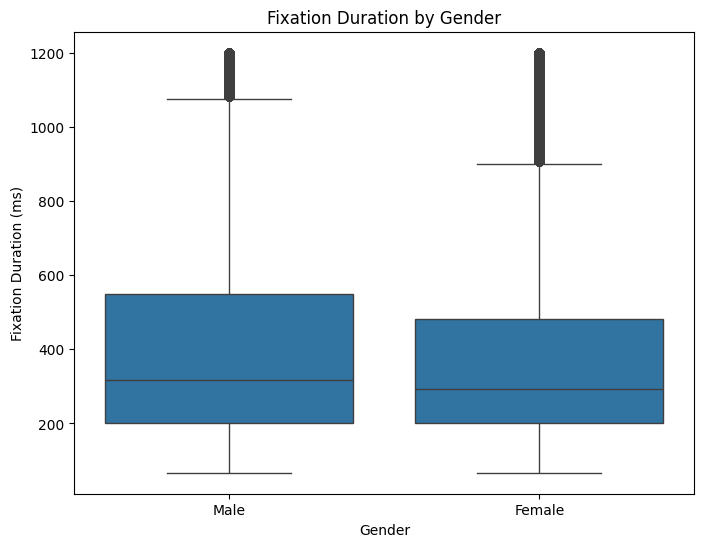

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(data=df_fixation, x='Gender', y='Eye movement event duration')
plt.title('Fixation Duration by Gender')
plt.ylabel('Fixation Duration (ms)')
plt.xlabel('Gender')
plt.show()


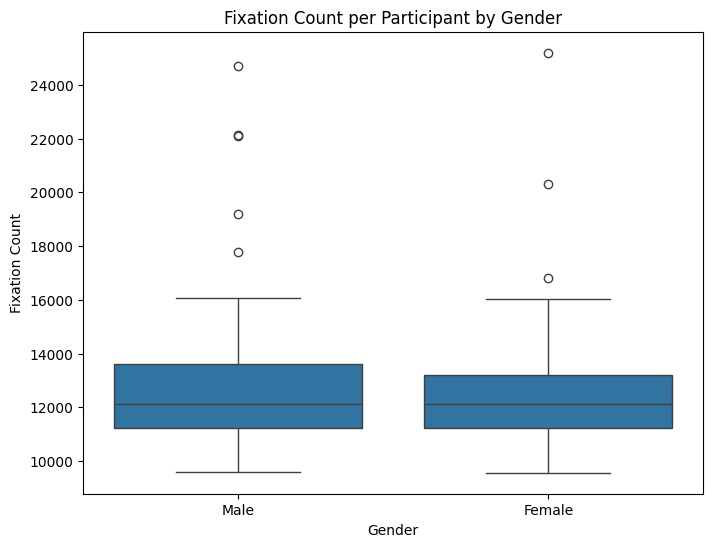

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=fixation_summary, x='Gender', y='Fixation_Count')
plt.title('Fixation Count per Participant by Gender')
plt.ylabel('Fixation Count')
plt.xlabel('Gender')
plt.show()


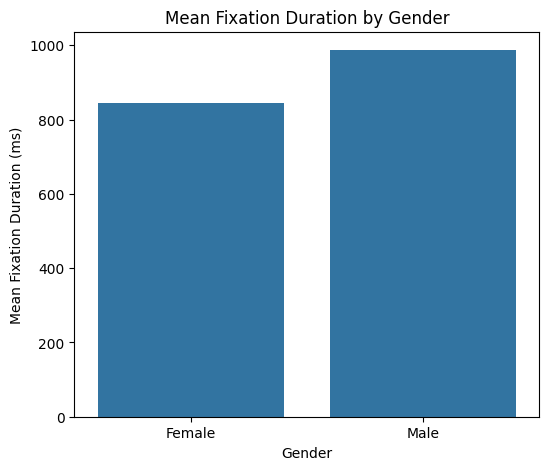

In [ ]:
gender_duration = fixation_summary.groupby('Gender')['Mean_Fixation_Duration'].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(data=gender_duration, x='Gender', y='Mean_Fixation_Duration')
plt.title('Mean Fixation Duration by Gender')
plt.ylabel('Mean Fixation Duration (ms)')
plt.xlabel('Gender')
plt.show()


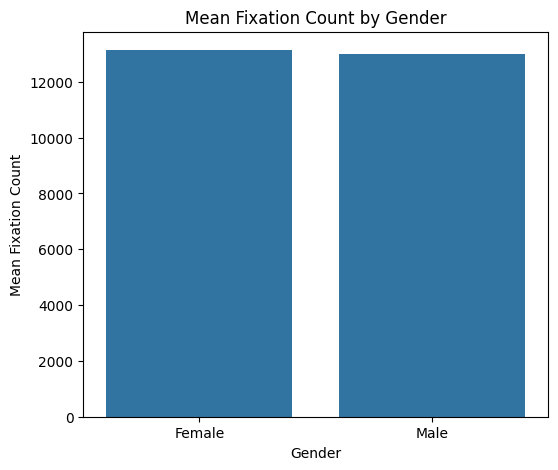

In [ ]:
gender_count = fixation_summary.groupby('Gender')['Fixation_Count'].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(data=gender_count, x='Gender', y='Fixation_Count')
plt.title('Mean Fixation Count by Gender')
plt.ylabel('Mean Fixation Count')
plt.xlabel('Gender')
plt.show()


## **1.5 Discussion & Conclusion**



###**Hypothesis Testing Summary**

Null Hypothesis (H₀): There is no significant difference in fixation duration between male and female participants.

Test Used: Welch’s t-test (independent samples, unequal variances)

Results:

- Fixation Duration:

      T-statistic: [3.174]

      P-value: 0.0022 < 0.05


###**Interpretation**

Since the p-value < 0.05, we manage to reject the null hypothesis. There is a evidence of gender difference in fixation duration.

This implies that there is different cognitive processing across genders in this task.



---


###**Cognitive Processing Insight**

**Interpretation**
Since the p-value = 0.0022 is less than 0.05, we reject the null hypothesis.
There is strong evidence of a significant gender difference in fixation duration.

This suggests that cognitive processing may differ across genders in the context of this task.

**Cognitive Processing Insight**

Fixations are moments where the eyes remain still to absorb visual information. The duration of fixations reflects:

- Information processing depth

- Cognitive load

- Attention engagement

Longer or shorter fixation durations across genders can indicate:

- Differences in visual scanning strategies

- Varying task engagement levels

- Distinct cognitive styles (e.g., analytical vs. holistic processing)

**Implication in This Study**

Our results show that fixation duration significantly differed between males and females.
This implies that gender plays a role in how participants process visual information in this specific task.

However, we also note that the sample is imbalanced, with fewer female participants, which could affect the generalizability of the findings.



###**Power Consideration**

Based on power analysis, we would need around 35 participants in each group to confidently detect a meaningful difference. The male group had enough participants (n = 58), but the female group had fewer (n = 27). Because of this, there might not be enough data from females to be fully sure about the results. So, even though we didn’t find a significant difference, we should be cautious - it’s possible a real difference exists, but we just didn’t have enough female data to detect it.

###**Conclusion**

The analysis reveals a significant gender-based difference in fixation duration. This may reflect differing cognitive strategies or engagement levels. However, caution is advised due to gender imbalance in the sample.




# **Research Question 2 : How does pupil diameter vary as an indicator of cognitive load when participants view different optical illusions?**


**Hypotheses**
**H₀ (Null Hypothesis):** There is no significant difference in pupil diameter between the mental power stimuli and non-mental power stimuli.

**H₁ (Alternative Hypothesis):** There is a significant difference in pupil diameter, with mental power stimuli producing larger pupil diameters, indicating higher cognitive load.



## **2.1 Data Pre-Processing**

Since our research question is related to the participant's pupil eye size and the current stimulus, we try to drop any unrelevant columns

In [ ]:
# Define irrelevant stimuli names (like calibration, instructions, etc.)
irrelevant_stimuli = [
    'Eyetracker Calibration',
    'Plus Sign',
    None  # Will match NaN
]

# Filter the DataFrame to exclude irrelevant stimuli
active_stimulus_df = df[
    (~df['Presented Stimulus name'].isin(irrelevant_stimuli)) &
    (df['Presented Stimulus name'].notna())
].copy()

# View the first 50 rows of active stimulus being shown
active_stimulus_df.head(50)

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,Recording start time UTC,Recording duration,Timeline name,Recording Fixation filter name,Recording software version,Recording resolution height,Recording resolution width,Recording monitor latency,Average calibration accuracy (mm),Average calibration precision SD (mm),Average calibration precision RMS (mm),Average calibration accuracy (degrees),Average calibration precision SD (degrees),Average calibration precision RMS (degrees),Average calibration accuracy (pixels),Average calibration precision SD (pixels),Average calibration precision RMS (pixels),Average validation accuracy (mm),Average validation precision SD (mm),Average validation precision RMS (mm),Average validation accuracy (degrees),Average validation precision SD (degrees),Average validation precision RMS (degrees),Average validation accuracy (pixels),Average validation precision SD (pixels),Average validation precision RMS (pixels),Eyetracker timestamp,Event,Event value,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Pupil diameter left,Pupil diameter right,Pupil diameter filtered,Eye openness left,Eye openness right,Eye openness filtered,Validity left,Validity right,Eye position left X (DACSmm),Eye position left Y (DACSmm),Eye position left Z (DACSmm),Eye position right X (DACSmm),Eye position right Y (DACSmm),Eye position right Z (DACSmm),Gaze point left X (DACSmm),Gaze point left Y (DACSmm),Gaze point right X (DACSmm),Gaze point right Y (DACSmm),Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Gaze point left X (MCSnorm),Gaze point left Y (MCSnorm),Gaze point right X (MCSnorm),Gaze point right Y (MCSnorm),Presented Stimulus name,Presented Media name,Presented Media width,Presented Media height,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Eye movement type,Eye movement event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Ungrouped,Client area position X (DACSpx),Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y
8737,67271712,71096640401,Eye Tracker,Optical_Illusion,09/06/2025,P01,Recording3,30/04/2025,30/04/2025,12:10:46.697,04:10:46.697,129318,Timeline1,Tobii I-VT (Fixation),24.21.435,1080,1920,10.0,8.6,2.0,2.4,0.83,0.19,0.23,31,7,9,6.8,2.2,2.3,0.72,0.23,0.24,25,8,8,4.382030e+09,NaN,NaN,1055.0,655.0,1058.0,651.0,1053.0,659.0,0.12342,0.14119,-0.98226,-0.00630,0.14253,-0.98977,2.845,2.778,2.804,9.084,9.542,9.214,Valid,Valid,221.5,100.6,540.3,291.5,101.8,544.4,289.4,178.2,288.1,180.2,0.5495,0.6064,0.5508,0.6030,0.5482,0.6097,Instruction (1),Instruction (3).png,1920.0,1080.0,0.0,0.0,1920.0,1080.0,Fixation,358.0,104.0,1055.0,651.0,0.5494,0.6027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8738,67280045,71096648734,Eye Tracker,Optical_Illusion,09/06/2025,P01,Recording3,30/04/2025,30/04/2025,12:10:46.697,04:10:46.697,129318,Timeline1,Tobii I-VT (Fixation),24.21.435,1080,1920,10.0,8.6,2.0,2.4,0.83,0.19,0.23,31,7,9,6.8,2.2,2.3,0.72,0.23,0.24,25,8,8,4.382038e+09,NaN,NaN,1053.0,648.0,1056.0,644.0,1050.0,651.0,0.12267,0.13790,-0.98282,-0.00757,0.13878,-0.99029,2.827,2.761,2.802,8.885,9.427,9.214,Valid,Valid,221.5,100.5,540.3,291.5,101.8,544.4,289.0,176.4,287.4,178.1,0.5484,0.5996,0.5499,0.5967,0.5469,0.6026,Instruction (1),Instruction (3).png,1920.0,1080.0,0.0,0.0,1920.0,1080.0,Fixation,358.0,104.0,1055.0,651.0,0.5494,0.6027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8739,67288379,71096657068,Eye Tracker,Optical_Illusion,09/06/2025,P01,Recording3,30/04/2025,30/04/2025,12:10:46.

In [ ]:
active_stimulus_df.shape

(583562, 101)

In [ ]:
# List of columns relevant to your research
columns_to_keep = [
    'Eyetracker timestamp',
    'Participant name',
    'Presented Stimulus name',
    'Presented Media name',
    'Pupil diameter left',
    'Pupil diameter right',
    'Validity left',
    'Validity right'
]

# If you're using 'Recording timestamp' instead of 'Eyetracker timestamp', switch it in the list
# Cleaned and reduced DataFrame
final_df = active_stimulus_df[columns_to_keep].copy()

# View the result
final_df.head()


,Eyetracker timestamp,Participant name,Presented Stimulus name,Presented Media name,Pupil diameter left,Pupil diameter right,Validity left,Validity right
8737,4.382030e+09,P01,Instruction (1),Instruction (3).png,2.845,2.778,Valid,Valid
8738,4.382038e+09,P01,Instruction (1),Instruction (3).png,2.827,2.761,Valid,Valid
8739,4.382047e+09,P01,Instruction (1),Instruction (3).png,2.835,2.773,Valid,Valid
8740,4.382055e+09,P01,Instruction (1),Instruction (3).png,2.851,2.766,Valid,Valid
8741,4.382063e+09,P01,Instruction (1),Instruction (3).png,2.824,2.753,Valid,Valid


In [ ]:
final_df.head(30)

,Eyetracker timestamp,Participant name,Presented Stimulus name,Presented Media name,Pupil diameter left,Pupil diameter right,Validity left,Validity right
8737,4.382030e+09,P01,Instruction (1),Instruction (3).png,2.845,2.778,Valid,Valid
8738,4.382038e+09,P01,Instruction (1),Instruction (3).png,2.827,2.761,Valid,Valid
8739,4.382047e+09,P01,Instruction (1),Instruction (3).png,2.835,2.773,Valid,Valid
8740,4.382055e+09,P01,Instruction (1),Instruction (3).png,2.851,2.766,Valid,Valid
8741,4.382063e+09,P01,Instruction (1),Instruction (3).png,2.824,2.753,Valid,Valid
8742,4.382072e+09,P01,Instruction (1),Instruction (3).png,2.807,2.745,Valid,Valid
8743,4.382080e+09,P01,Instruction (1),Instruction (3).png,2.808,2.753,Valid,Valid
8744,4.382088e+09,P01,Instruction (1),Instruction (3).png,2.811,2.747,Valid,Valid
8745,4.382097e+09,P01,Instruction (1),Instruction (3).png,2.843,2.738,Valid,Valid
8746,4.382105e+09,P01,Instruction (1),Instruction (3).png,2.807,2.734,Valid,Valid


/tmp/ipython-input-37-4080168063.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


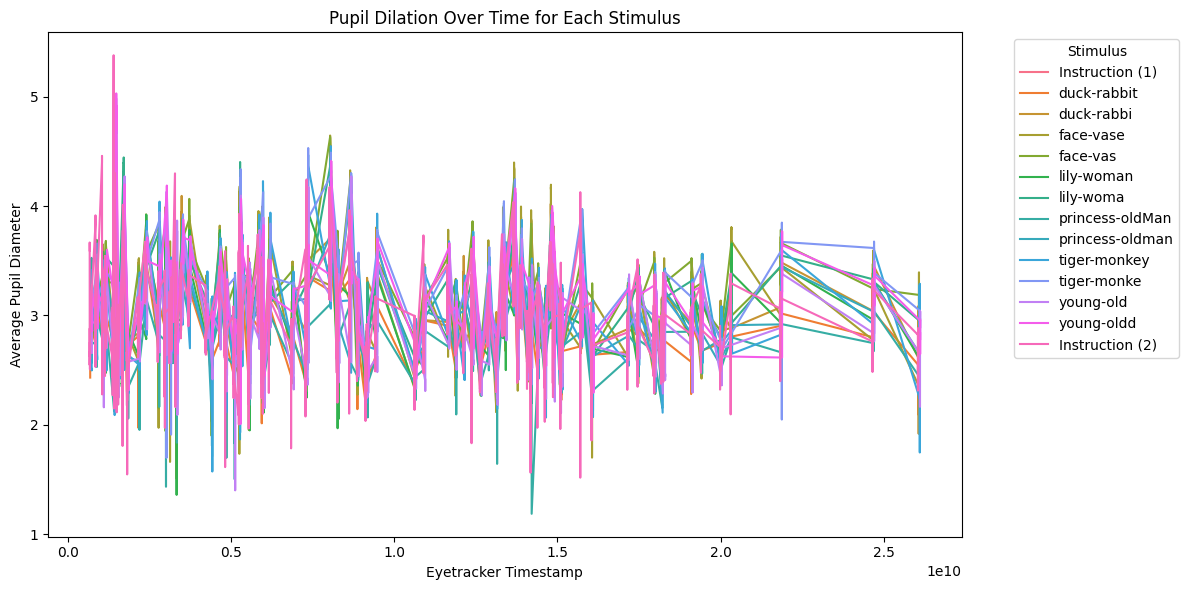

In [ ]:
final_df.dropna(subset=['Eyetracker timestamp', 'Pupil diameter left', 'Pupil diameter right'], inplace=True)
final_df['Pupil diameter average'] = final_df[['Pupil diameter left', 'Pupil diameter right']].mean(axis=1)
# Filter rows where both eyes' validity are 'Valid'
final_df = final_df[(final_df['Validity left'] == 'Valid') & (final_df['Validity right'] == 'Valid')]


import seaborn as sns
import matplotlib.pyplot as plt


# Create line plot for all stimuli
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=final_df,
    x='Eyetracker timestamp',
    y='Pupil diameter average',
    hue='Presented Stimulus name',
    estimator='mean',  # You can also try 'median' or remove this to show all lines
    ci=None  # Removes confidence interval shading
)


plt.title('Pupil Dilation Over Time for Each Stimulus')
plt.xlabel('Eyetracker Timestamp')
plt.ylabel('Average Pupil Diameter')
plt.legend(title='Stimulus', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [ ]:
unique_stimuli = final_df['Presented Stimulus name'].unique()
print(unique_stimuli)

['Instruction (1)' 'duck-rabbit' 'duck-rabbi' 'face-vase' 'face-vas'
 'lily-woman' 'lily-woma' 'princess-oldMan' 'princess-oldman'
 'tiger-monkey' 'tiger-monke' 'young-old' 'young-oldd' 'Instruction (2)']


In [ ]:

# Define the stimuli categories
mental_power_stimuli = [
    'duck-rabbit', 'face-vase', 'lily-woman',
    'princess-oldMan', 'tiger-monkey', 'young-old'
]

non_mental_power_stimuli = [
    'duck-rabbi', 'face-vas', 'lily-woma',
    'princess-oldman', 'tiger-monke', 'young-oldd', 'Instruction (2)', 'Instruction (1)'
]


# Split the datasets
mental_df = final_df[final_df['Presented Stimulus name'].isin(mental_power_stimuli)].copy()
non_mental_df = final_df[final_df['Presented Stimulus name'].isin(non_mental_power_stimuli)].copy()

# Optional: Reset indices
mental_df.reset_index(drop=True, inplace=True)
non_mental_df.reset_index(drop=True, inplace=True)

# Print or save the datasets
print("Mental Power Stimuli Dataset:")
print(mental_df)

print("\nNon-Mental Power (Question) Stimuli Dataset:")
print(non_mental_df)

Mental Power Stimuli Dataset:
        Eyetracker timestamp Participant name Presented Stimulus name  \
0               4.390613e+09              P01             duck-rabbit   
1               4.390622e+09              P01             duck-rabbit   
2               4.390630e+09              P01             duck-rabbit   
3               4.390638e+09              P01             duck-rabbit   
4               4.390647e+09              P01             duck-rabbit   
...                      ...              ...                     ...   
294438          9.488627e+09              P85               young-old   
294439          9.488635e+09              P85               young-old   
294440          9.488643e+09              P85               young-old   
294441          9.488652e+09              P85               young-old   
294442          9.488660e+09              P85               young-old   

       Presented Media name  Pupil diameter left  Pupil diameter right  \
0           duck-ra

In [ ]:
mental_df.shape

(294443, 9)

In [ ]:
non_mental_df.shape

(231751, 9)

## **2.2 Event Detection**

In [ ]:
import pandas as pd

# Assuming final_df is your DataFrame

# Detect where the stimulus changes compared to previous row
final_df['Event_Start'] = final_df['Presented Stimulus name'] != final_df['Presented Stimulus name'].shift(1)

# Filter rows where Event_Start is True (start of a new stimulus event)
events_df = final_df[final_df['Event_Start']].copy()

# Optional: Select relevant columns for event info
events_df = events_df[['Eyetracker timestamp', 'Participant name', 'Presented Stimulus name', 'Presented Media name']]

print(events_df.head(10))


       Eyetracker timestamp Participant name Presented Stimulus name  \
8737           4.382030e+09              P01         Instruction (1)   
9826           4.390613e+09              P01             duck-rabbit   
10463          4.395614e+09              P01              duck-rabbi   
11694          4.404514e+09              P01               face-vase   
12301          4.409514e+09              P01                face-vas   
12813          4.412989e+09              P01              lily-woman   
13418          4.417998e+09              P01               lily-woma   
13695          4.420156e+09              P01         princess-oldMan   
14301          4.425189e+09              P01         princess-oldman   
14825          4.429081e+09              P01            tiger-monkey   

      Presented Media name  
8737   Instruction (3).png  
9826       duck-rabbit.PNG  
10463       duck-rabbi.png  
11694        face-vase.jpg  
12301         face-vas.png  
12813       lily-woman.PNG  
1341

In [ ]:
unique_participants = final_df['Participant name'].nunique()
print(f"Number of unique participants: {unique_participants}")


Number of unique participants: 85


## **2.3 Analysis**

In [ ]:
# Mean and standard deviation of pupil diameter
mental_avg = mental_df['Pupil diameter average']
non_mental_avg = non_mental_df['Pupil diameter average']

print("Mental Stimuli - Mean:", mental_avg.mean(), " | Std:", mental_avg.std())
print("Non-Mental Stimuli - Mean:", non_mental_avg.mean(), " | Std:", non_mental_avg.std())


Mental Stimuli - Mean: 3.084434938171395  | Std: 0.42235763483021477
Non-Mental Stimuli - Mean: 3.046838160353137  | Std: 0.4048837903525534


We then need determine the normality of our dataset, to ensure a suitable hypothesis testing method in the future.

In [ ]:
from scipy.stats import shapiro

shapiro_mental = shapiro(mental_avg.sample(5000, random_state=1))  # sampling for large N
shapiro_non_mental = shapiro(non_mental_avg.sample(5000, random_state=1))

print("Shapiro Mental:", shapiro_mental)
print("Shapiro Non-Mental:", shapiro_non_mental)


Shapiro Mental: ShapiroResult(statistic=np.float64(0.9746198283076235), pvalue=np.float64(6.209312195574873e-29))
Shapiro Non-Mental: ShapiroResult(statistic=np.float64(0.9523238613996907), pvalue=np.float64(1.4590499913163187e-37))


and from the result, we obtained a p value really small (p value < 0.5), thus the dataset is not normally distributed.

Thus, we need to use Mann-Whitney U Test to test our non-normalized dataset and to test our hypothesis

In [ ]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(mental_df['Pupil diameter average'],
                       non_mental_df['Pupil diameter average'],
                       alternative='two-sided')

print(f"Mann-Whitney U test result: U-statistic = {stat}, p-value = {p}")


Mann-Whitney U test result: U-statistic = 36259351798.5, p-value = 0.0


## **2.4 Data Visualisation**

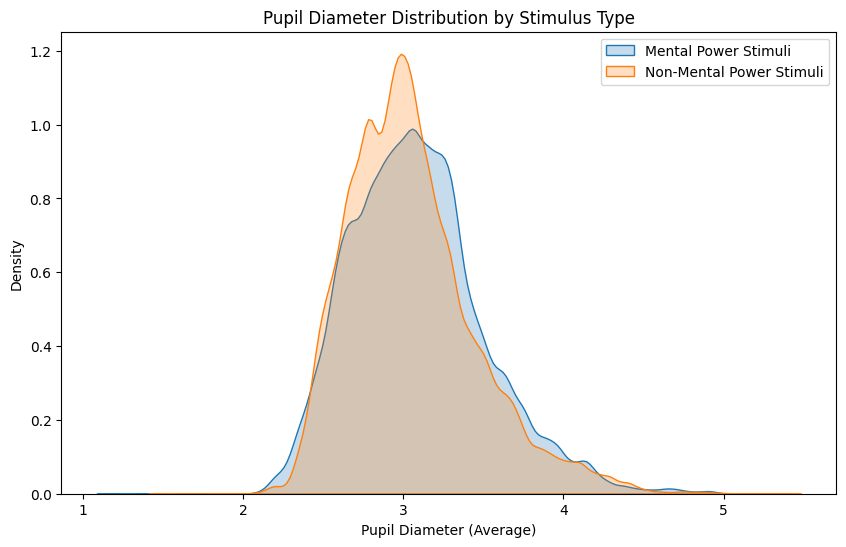

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(mental_df['Pupil diameter average'], label='Mental Power Stimuli', fill=True)
sns.kdeplot(non_mental_df['Pupil diameter average'], label='Non-Mental Power Stimuli', fill=True)
plt.xlabel('Pupil Diameter (Average)')
plt.title('Pupil Diameter Distribution by Stimulus Type')
plt.legend()
plt.show()


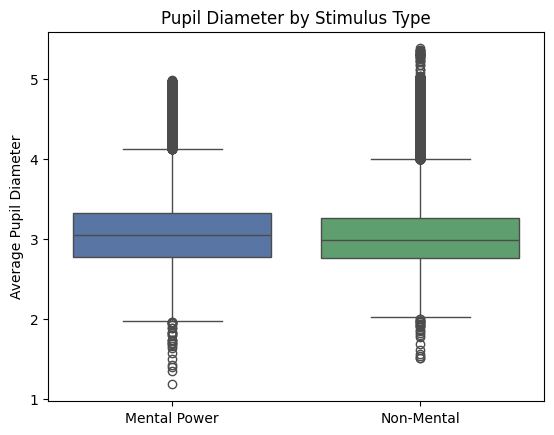

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data_to_plot = [
    mental_df['Pupil diameter average'].dropna().tolist(),
    non_mental_df['Pupil diameter average'].dropna().tolist()
]

sns.boxplot(data=data_to_plot, palette=["#4c72b0", "#55a868"])
plt.xticks([0, 1], ["Mental Power", "Non-Mental"])
plt.ylabel("Average Pupil Diameter")
plt.title("Pupil Diameter by Stimulus Type")
plt.show()


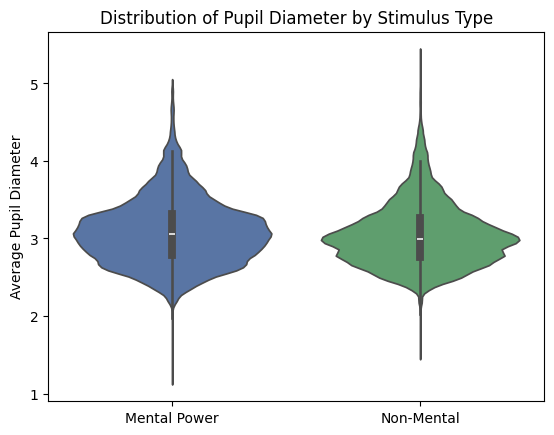

In [ ]:
sns.violinplot(data=data_to_plot, palette=["#4c72b0", "#55a868"])
plt.xticks([0, 1], ["Mental Power", "Non-Mental"])
plt.ylabel("Average Pupil Diameter")
plt.title("Distribution of Pupil Diameter by Stimulus Type")
plt.show()


## **2.5 Conclusion and Results**

## **Interpretation:**
Since the p-value < 0.05, you reject the null hypothesis.

# **This means:**

There is a statistically significant difference in average pupil diameter between mental power stimuli and non-mental (question-based) stimuli.

# **Cognitive Load Insight:**

*   Pupil size is controlled by the autonomic nervous system, specifically the
*   balance between the parasympathetic (constricts pupil) and sympathetic (dilates pupil) branches.
*   When higher cognitive demand or mental effort is required, the sympathetic nervous system becomes more active.
*   This increased sympathetic activity triggers the dilation of the pupil (mydriasis) to allow more light into the eye.
*   Larger pupils improve visual acuity and sensitivity, enhancing the brain’s ability to process complex visual information.
*   Additionally, pupil dilation is linked to the activity of the locus coeruleus–norepinephrine (LC-NE) system in the brain, which modulates arousal, attention, and cognitive control.
*   Increased LC-NE activity during demanding tasks causes pupil dilation as an index of mental effort and cognitive load.
*   Thus, pupil dilation reflects not only a physical response to light but also a neurophysiological marker of increased attentional and cognitive processing.

In summary: Pupil dilation during high mental effort results from sympathetic nervous system activation and LC-NE system involvement, optimizing sensory input and indicating increased cognitive load.